## EXERCICE 9 : Analyse ANOVA

Nous allons dans cet exercice effectuer en détail une analyse ANOVA sur deux jeux de données classiques afin de bien comprendre son fonctionnement.

*Inspire de  https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/*


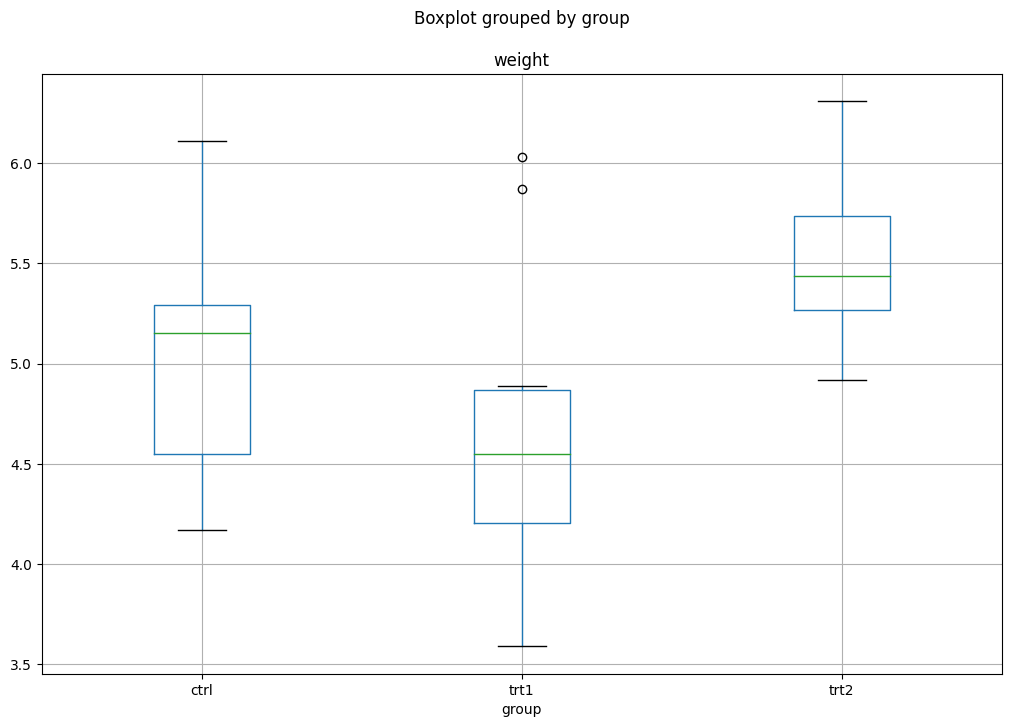

In [10]:

#1) INITIALISATION

#1.1) Importe les modules matplotlib (pour la visualisation de graphes) et pandas (pour la manipulation de donnees)
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

#1.2) charge les donnees
data = pd.read_csv("PlantGrowth.csv")
 
#1.3) represente un resume des données (necessite d'avoir appele matplotlib)
data.boxplot('weight', by='group', figsize=(12, 8))
plt.show()


### <span style="color:blue">QUESTIONS 1</span> :

- Que signifient les box-plots (ou boites à moustache) ? Vous pouvez taper 'data.boxplot?' pour des informations élémentaires.
- Les groupes vous semblent-il distribués de manière similaire ?
- Les variabilités intra-groupe vous semblent-t-elles similaires ?

### <span style="color:blue">REPONSES 1</span> :
- ...
- ...
- ...

In [11]:
#2) STATISTIQUE DE FISHER

 
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
 
k = len(grps)  # nombre de groupes
N = len(data.values)  # nombre d'observations
n = data.groupby('group').size()[0] #nombre d'observations dans chaque groupe (on remarque que tous les groupes on la meme taille)

#calcule la variabilite due aux interactions entre groupes (Sum of Squares Between)
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n)- (data['weight'].sum()**2)/N

#calcule la variabilite due aux differences entre les observations (Sum of Squares Within)
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

#calcule la variabilite totale (Sum of Squares Total)
SStotal = sum_y_squared - (data['weight'].sum()**2)/N

#defini les degres de liberte
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#calcule la statistique de Fisher
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin


p = stats.f.sf(F, DFbetween, DFwithin)

print(p)

0.015909958325623124


### <span style="color:blue">QUESTION 2</span> :


Faire le lien avec le cours, puis chercher ce que fait la fonction *stats.f.sf* afin d'expliquer ce que signifie *p*. Qu'en déduisez vous sur l'égalité ou l'inégalité des moyennes ? 

### <span style="color:blue">REPONSE 2</span> :

p<0.05,donc avec un niveau de confiance de 95%, on peut dire que les moyennes des groupes sont significativement différentes, et donc que l'appartenance aux groupes influence la moyenne


### <span style="color:blue">QUESTION 3</span> :

Adaptez ce code pour étudier la colonne 'f2' des données IRIS de 'DataIris.csv'. Que déduisez vous du résultat sur les valeurs de la colonne (variable) dans les trois groupes d'IRIS considérés ?

### <span style="color:blue">REPONSE 3</span> :


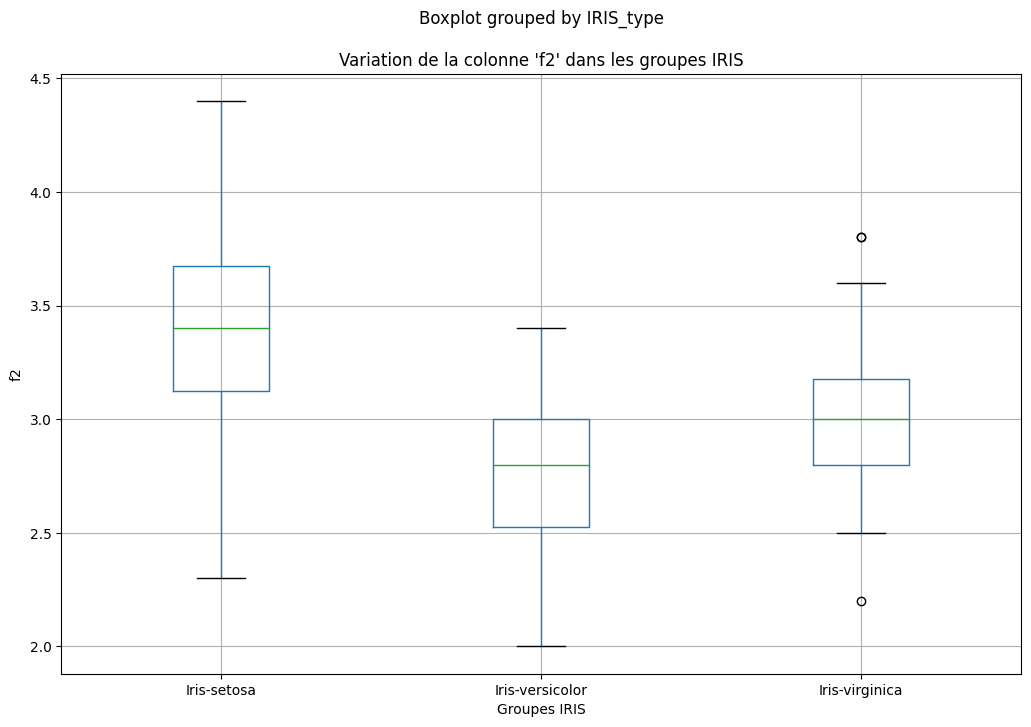

Valeur p pour la variation de 'f2' entre les groupes IRIS : 1.3279165184550504e-16


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Charger les données IRIS
data = pd.read_csv("DataIris.csv")

# Visualisation des boîtes à moustaches (boxplot) de la colonne 'f2' par groupe 'IRIS_type'
data.boxplot('f2', by='IRIS_type', figsize=(12, 8))
plt.title("Variation de la colonne 'f2' dans les groupes IRIS")
plt.xlabel("Groupes IRIS")
plt.ylabel("f2")
plt.show()

# Analyse de la variation de 'f2' entre les groupes
grps = pd.unique(data.IRIS_type.values)
d_data = {grp: data['f2'][data.IRIS_type == grp] for grp in grps}

k = len(grps)  # nombre de groupes
N = len(data.values)  # nombre d'observations
n = data.groupby('IRIS_type').size().min()  # nombre d'observations dans chaque groupe

# Calcul de la variabilité due aux interactions entre groupes (Sum of Squares Between)
SSbetween = (sum(data.groupby('IRIS_type').sum()['f2'] ** 2) / n) - (data['f2'].sum() ** 2) / N

# Calcul de la variabilité due aux différences entre les observations (Sum of Squares Within)
sum_y_squared = sum([value ** 2 for value in data['f2'].values])
SSwithin = sum_y_squared - sum(data.groupby('IRIS_type').sum()['f2'] ** 2) / n

# Calcul de la variabilité totale (Sum of Squares Total)
SStotal = sum_y_squared - (data['f2'].sum() ** 2) / N

# Définition des degrés de liberté
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

# Calcul de la statistique de Fisher
MSbetween = SSbetween / DFbetween
MSwithin = SSwithin / DFwithin

F = MSbetween / MSwithin

# Calcul de la valeur p
p = stats.f.sf(F, DFbetween, DFwithin)

print("Valeur p pour la variation de 'f2' entre les groupes IRIS :", p)



### <span style="color:blue">QUESTION 4</span> :

Est-ce qu'un test non-paramétrique de kruskal wallis conduit à la même conclusion ?

On pourra utiliser la fonction scipy.stats.kruskal

### <span style="color:blue">REPONSE 4</span> :

In [13]:
import pandas as pd
import scipy.stats as stats

# Charger les données IRIS
data = pd.read_csv("DataIris.csv")

# Groupes d'IRIS
groups = [data[data['IRIS_type'] == group]['f2'] for group in data['IRIS_type'].unique()]

# Effectuer le test de Kruskal-Wallis
kw_statistic, p_value = stats.kruskal(*groups)

print("Statistique de Kruskal-Wallis :", kw_statistic)
print("Valeur p pour le test de Kruskal-Wallis :", p_value)


Statistique de Kruskal-Wallis : 62.49463010053111
Valeur p pour le test de Kruskal-Wallis : 2.6882119006774528e-14
